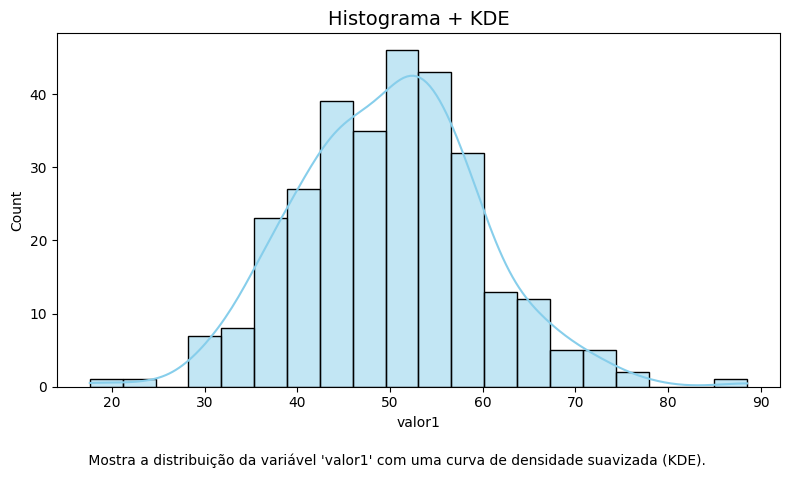

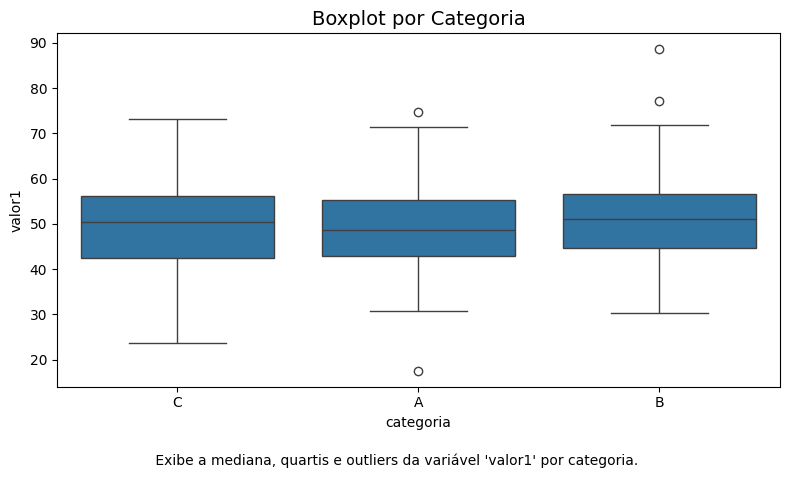

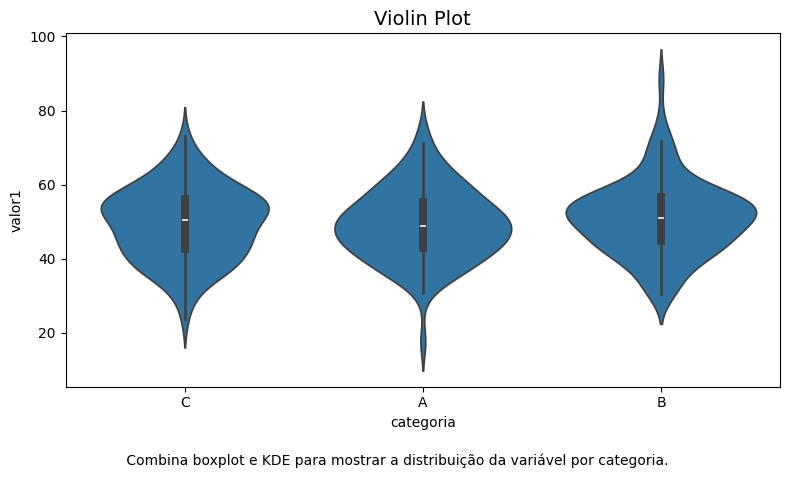

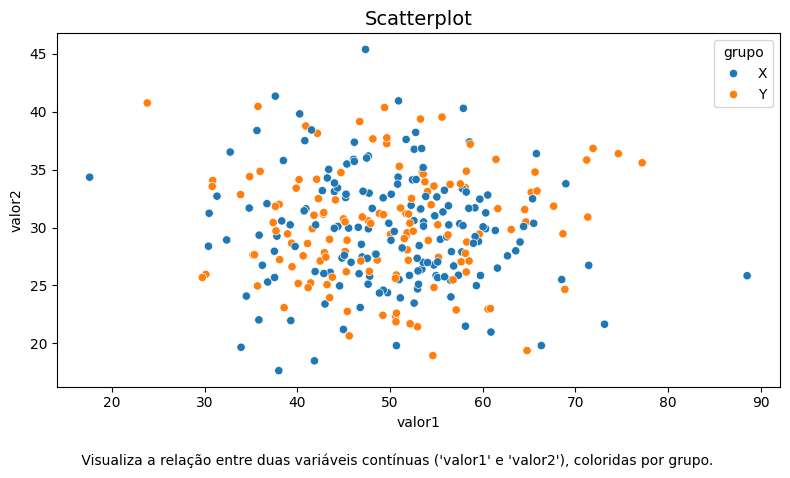

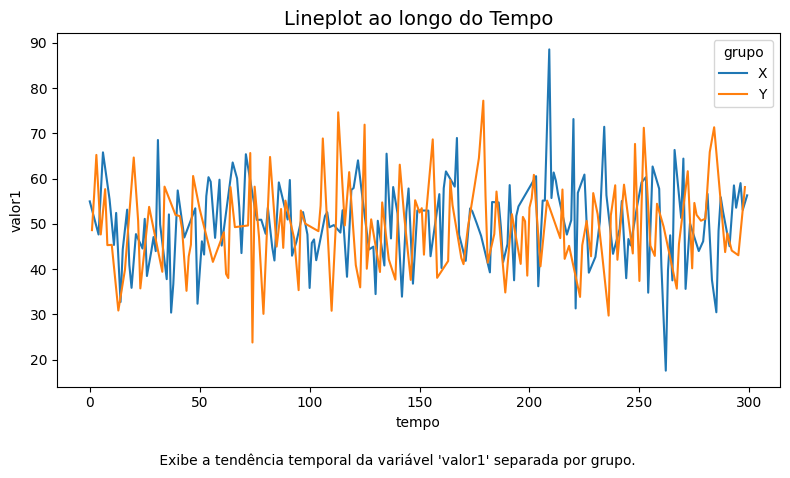

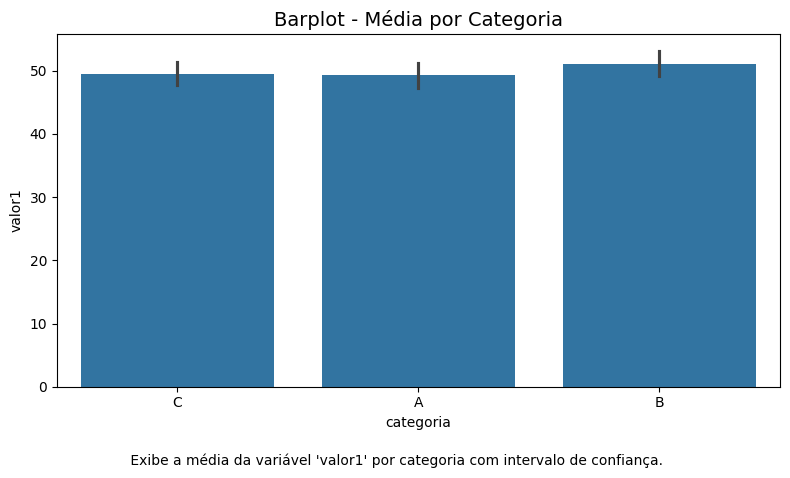

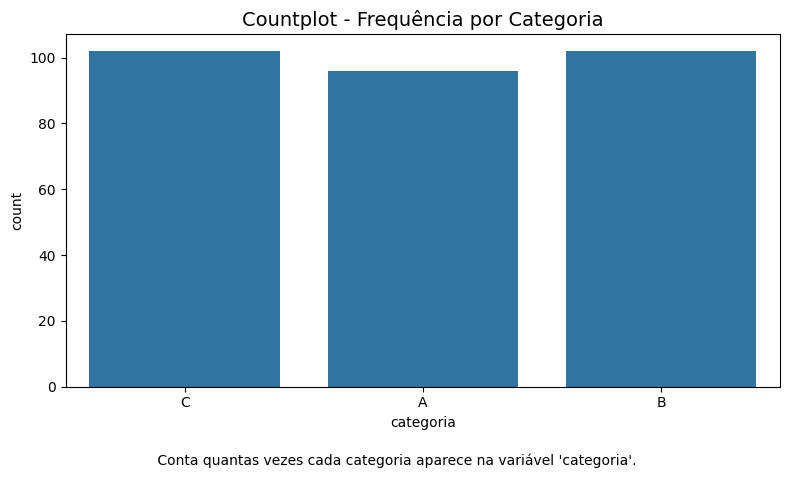

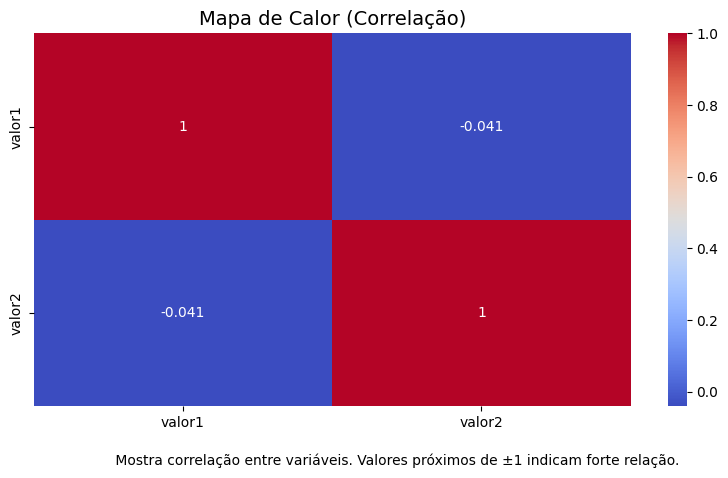

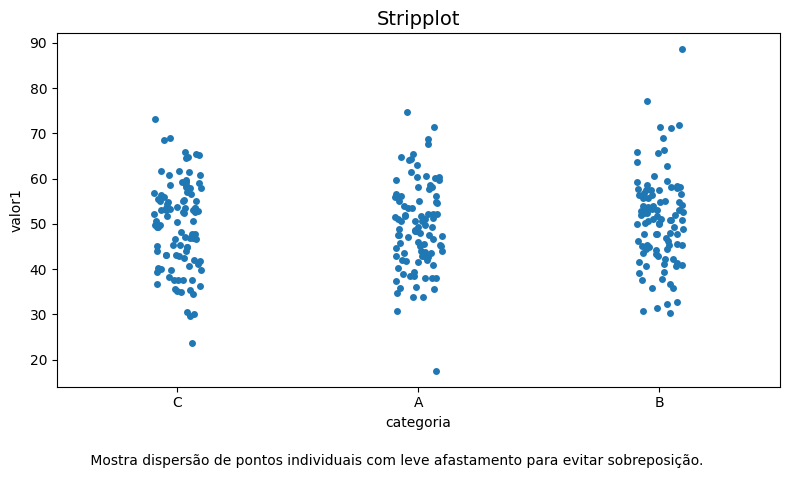

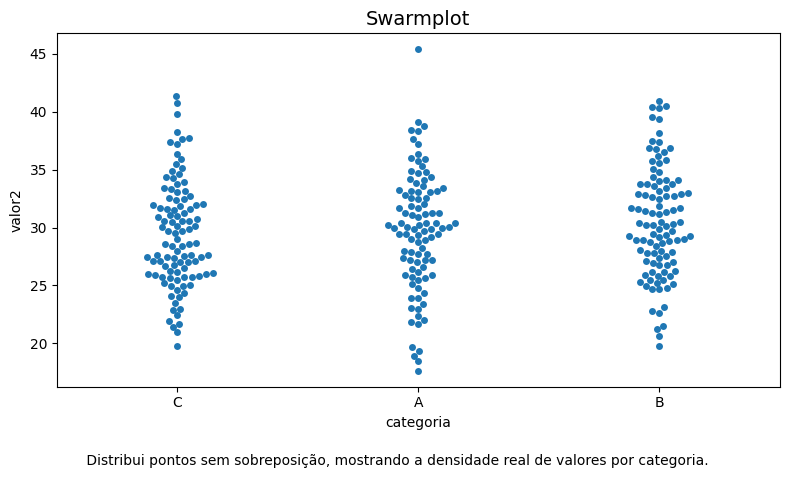

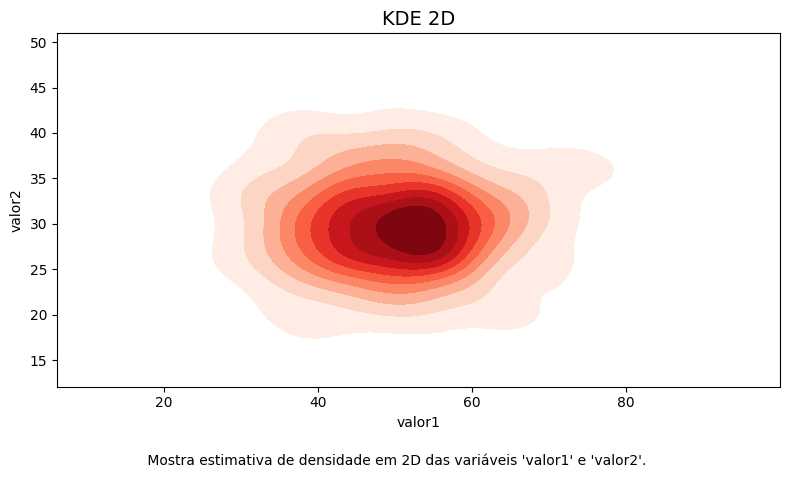

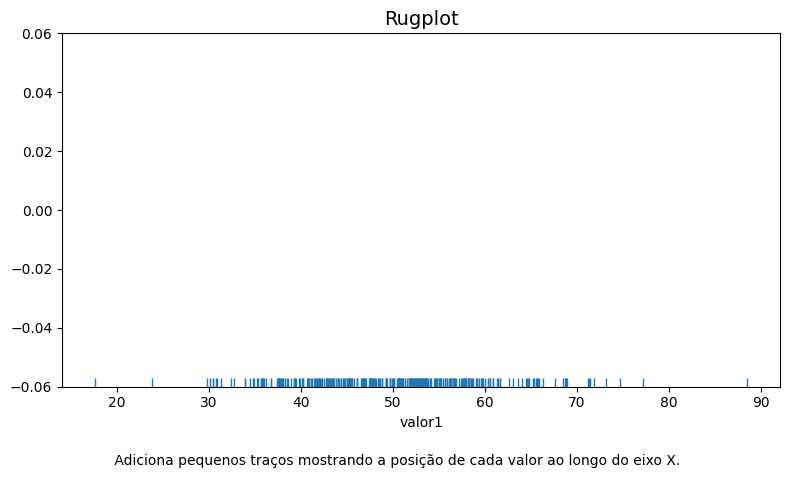

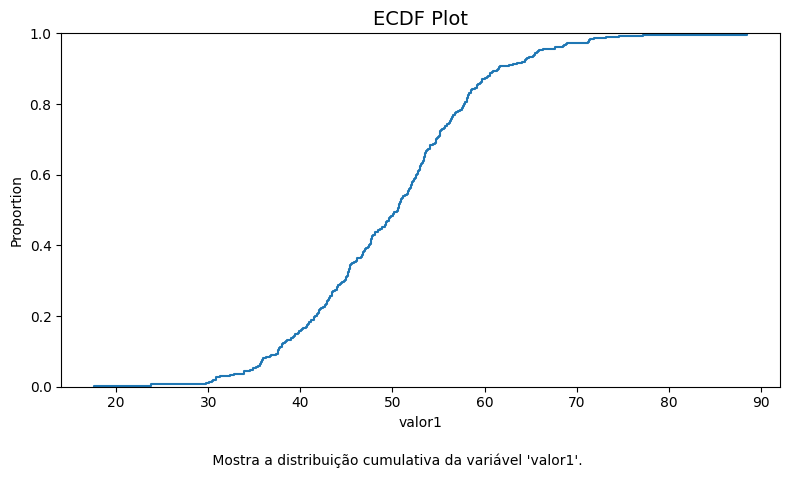

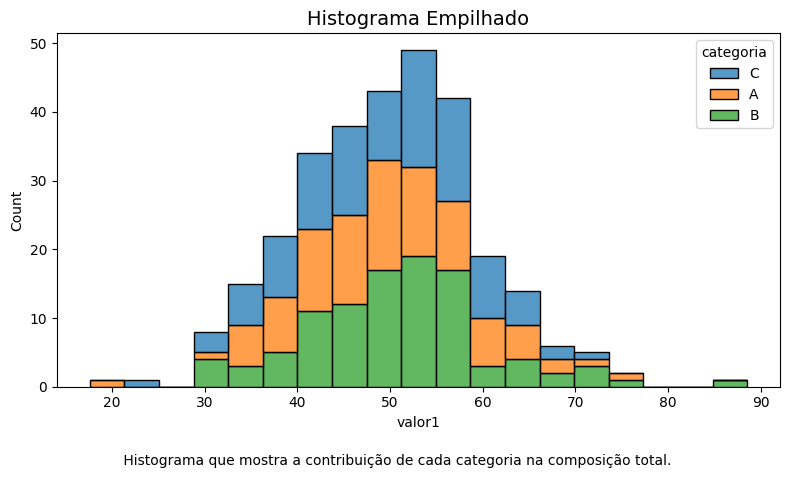

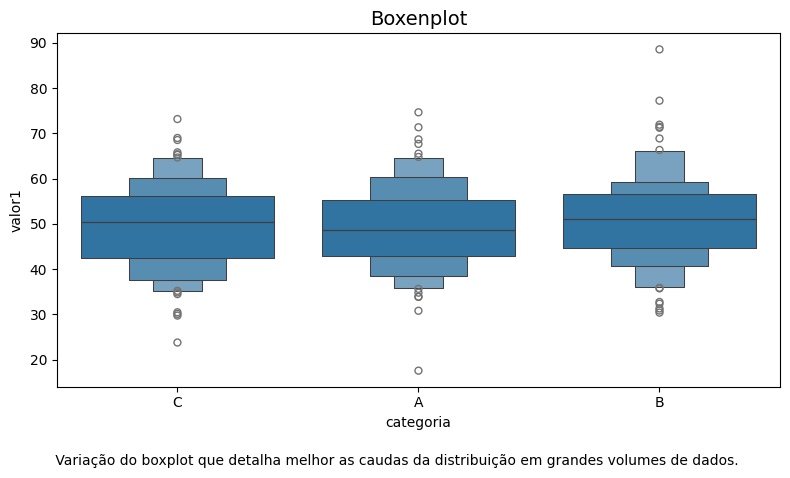

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Gerar dados fictícios
np.random.seed(42)
n = 300
df = pd.DataFrame({
    'valor1': np.random.normal(50, 10, n),
    'valor2': np.random.normal(30, 5, n),
    'categoria': np.random.choice(['A', 'B', 'C'], size=n),
    'grupo': np.random.choice(['X', 'Y'], size=n),
    'tempo': np.arange(n)
})

# Lista de gráficos com descrições
graficos = [
    {
        "titulo": "Histograma + KDE",
        "plot": lambda ax: sns.histplot(df['valor1'], kde=True, bins=20, ax=ax, color='skyblue'),
        "descricao": "Mostra a distribuição da variável 'valor1' com uma curva de densidade suavizada (KDE)."
    },
    {
        "titulo": "Boxplot por Categoria",
        "plot": lambda ax: sns.boxplot(data=df, x='categoria', y='valor1', ax=ax),
        "descricao": "Exibe a mediana, quartis e outliers da variável 'valor1' por categoria."
    },
    {
        "titulo": "Violin Plot",
        "plot": lambda ax: sns.violinplot(data=df, x='categoria', y='valor1', ax=ax),
        "descricao": "Combina boxplot e KDE para mostrar a distribuição da variável por categoria."
    },
    {
        "titulo": "Scatterplot",
        "plot": lambda ax: sns.scatterplot(data=df, x='valor1', y='valor2', hue='grupo', ax=ax),
        "descricao": "Visualiza a relação entre duas variáveis contínuas ('valor1' e 'valor2'), coloridas por grupo."
    },
    {
        "titulo": "Lineplot ao longo do Tempo",
        "plot": lambda ax: sns.lineplot(data=df, x='tempo', y='valor1', hue='grupo', ax=ax),
        "descricao": "Exibe a tendência temporal da variável 'valor1' separada por grupo."
    },
    {
        "titulo": "Barplot - Média por Categoria",
        "plot": lambda ax: sns.barplot(data=df, x='categoria', y='valor1', ax=ax),
        "descricao": "Exibe a média da variável 'valor1' por categoria com intervalo de confiança."
    },
    {
        "titulo": "Countplot - Frequência por Categoria",
        "plot": lambda ax: sns.countplot(data=df, x='categoria', ax=ax),
        "descricao": "Conta quantas vezes cada categoria aparece na variável 'categoria'."
    },
    {
        "titulo": "Mapa de Calor (Correlação)",
        "plot": lambda ax: sns.heatmap(df[['valor1', 'valor2']].corr(), annot=True, cmap='coolwarm', ax=ax),
        "descricao": "Mostra correlação entre variáveis. Valores próximos de ±1 indicam forte relação."
    },
    {
        "titulo": "Stripplot",
        "plot": lambda ax: sns.stripplot(data=df, x='categoria', y='valor1', ax=ax, jitter=True),
        "descricao": "Mostra dispersão de pontos individuais com leve afastamento para evitar sobreposição."
    },
    {
        "titulo": "Swarmplot",
        "plot": lambda ax: sns.swarmplot(data=df, x='categoria', y='valor2', ax=ax),
        "descricao": "Distribui pontos sem sobreposição, mostrando a densidade real de valores por categoria."
    },
    {
        "titulo": "KDE 2D",
        "plot": lambda ax: sns.kdeplot(data=df, x='valor1', y='valor2', ax=ax, fill=True, cmap='Reds'),
        "descricao": "Mostra estimativa de densidade em 2D das variáveis 'valor1' e 'valor2'."
    },
    {
        "titulo": "Rugplot",
        "plot": lambda ax: sns.rugplot(data=df, x='valor1', ax=ax),
        "descricao": "Adiciona pequenos traços mostrando a posição de cada valor ao longo do eixo X."
    },
    {
        "titulo": "ECDF Plot",
        "plot": lambda ax: sns.ecdfplot(data=df, x='valor1', ax=ax),
        "descricao": "Mostra a distribuição cumulativa da variável 'valor1'."
    },
    {
        "titulo": "Histograma Empilhado",
        "plot": lambda ax: sns.histplot(data=df, x='valor1', hue='categoria', multiple='stack', ax=ax),
        "descricao": "Histograma que mostra a contribuição de cada categoria na composição total."
    },
    {
        "titulo": "Boxenplot",
        "plot": lambda ax: sns.boxenplot(data=df, x='categoria', y='valor1', ax=ax),
        "descricao": "Variação do boxplot que detalha melhor as caudas da distribuição em grandes volumes de dados."
    }
]

# Exibir os gráficos individualmente com explicações
for graf in graficos:
    fig, ax = plt.subplots(figsize=(8, 5))
    graf["plot"](ax)
    ax.set_title(graf["titulo"], fontsize=14)
    plt.figtext(0.5, 0.01, f' {graf["descricao"]}', wrap=True, horizontalalignment='center', fontsize=10)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
